In [201]:
import torch
import time
import random

In [202]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [203]:
import d2l
from d2l import torch as d2l

torch.Size([1000, 2])
torch.Size([1000])
features: tensor([[ 0.9599, -2.5210],
        [-0.8455, -0.2872],
        [ 0.0271,  0.3592],
        ...,
        [ 0.1287,  0.4505],
        [-0.6295,  0.4243],
        [ 1.4478, -0.3561]]) 
label: tensor([[14.6975],
        [ 3.4823],
        [ 3.0105],
        [10.7817],
        [ 8.3038],
        [ 4.7034],
        [ 4.4275],
        [ 0.6390],
        [-0.3718],
        [ 2.4500],
        [ 5.1097],
        [10.1929],
        [ 2.4206],
        [-1.0823],
        [10.5045],
        [ 7.9700],
        [-1.7431],
        [ 6.0562],
        [ 2.0815],
        [ 4.2978],
        [ 5.6648],
        [ 6.2039],
        [ 2.8873],
        [ 0.7236],
        [ 2.9208],
        [-0.5241],
        [ 0.1960],
        [ 1.9240],
        [ 4.8533],
        [ 0.8983],
        [ 7.9042],
        [ 3.6322],
        [ 1.4862],
        [ 1.7158],
        [ 5.1743],
        [ 7.1549],
        [ 5.0390],
        [ 6.9144],
        [ 4.2323],
        [-0.6474],

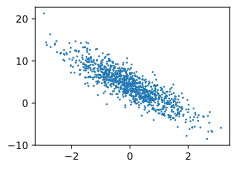

In [204]:
def synthetic_data(w, b, num_examples):
    #噪声生成
    X = torch.normal(0,1,(num_examples, len(w))) #均值为0，标准差为1，size为num_examples*len(w)
    print(X.shape)
    y = torch.matmul(X,w) + b
    print(y.shape)
    y += torch.normal(0,0.01,y.shape)#噪声项
    return X,y.reshape((-1,1))#reshape(-1,1)表示将y变成列向量,-1表示自动计算行数,1表示列数

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features,'\nlabel:', labels)
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);





In [205]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [206]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.3242, -1.6828]) 
label: tensor([10.5659])


In [207]:
#读数据，每次抽取batch_size个样本
def data_iter(batch_size, features, labels):#feature是X，label是y
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]
    

In [208]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X)
    break

tensor([[-0.2806, -0.1981],
        [ 0.9102, -1.1454],
        [ 0.7131,  0.9374],
        [ 1.1273, -1.2031],
        [-1.5866, -0.4802],
        [ 0.9386,  0.5755],
        [-0.3793, -0.3629],
        [ 1.6832, -1.7174],
        [ 0.5131, -0.6089],
        [-0.0992,  1.0220]])


In [209]:
w = torch.normal(0, 0.01, size=(2,1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def linreg(X, w, b):
    return torch.matmul(X, w) + b

def squared_loss (y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [210]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            


In [214]:
lr = 0.5
num_epochs  = 3
net  = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        y_hat = net(X, w, b)
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
      
        train_l = loss(net(features, w, b), labels)
        print(f"epoch {epoch + 1}, loss {float(train_l.mean()):f}")

epoch 1, loss 0.000058
epoch 2, loss 0.000060
epoch 3, loss 0.000051
